### <center> Image Denoising using Shearlets </center>

In [1]:
# Clone the libraris
#Pkg.clone("https://github.com/arsenal9971/Shearlab.jl.git")

In [2]:
# Loard the Pkg
#push!(LOAD_PATH,pwd()*"/../../src") 
#import Shearlab
using Shearlab
using PyPlot
#reload("Shearlab")

In [3]:
# Read Data
n = 512;
# The path of the image
name = "../../data_samples/lena.jpg";
data = Shearlab.load_image(name, n);
#Rescale image in [0,1] summing the 3 arrays in the RGB format
#data = Shearlab.rescale(sum(data,3)); this time no rescaling ; 

In [4]:
# Reduce one dimension 
data = data[:,:,1];

In [5]:
# settings
sigma = 30;
scales = 5;
thresholdingFactor = 3;

In [6]:
# Give noise to data
X = data;
Xnoisy = X + sigma*randn(size(X));

In [8]:
# Get the Shearlet system 
shearletSystem = Shearlab.getshearletsystem2D(size(X,1), size(X,2), scales);

In [9]:
# Decomposition
coeffs = Shearlab.sheardec2D( Xnoisy, shearletSystem);

In [10]:
# Thresholding
coeffs = coeffs.*(abs(coeffs).> thresholdingFactor*reshape(repmat(shearletSystem.RMS',size(X,1)*size(X,2), 1),
        size(X,1),size(X,2),length(shearletSystem.RMS))*sigma);

In [11]:
# Reconstruction
Xrec = Shearlab.shearrec2D(coeffs, shearletSystem);

### Results

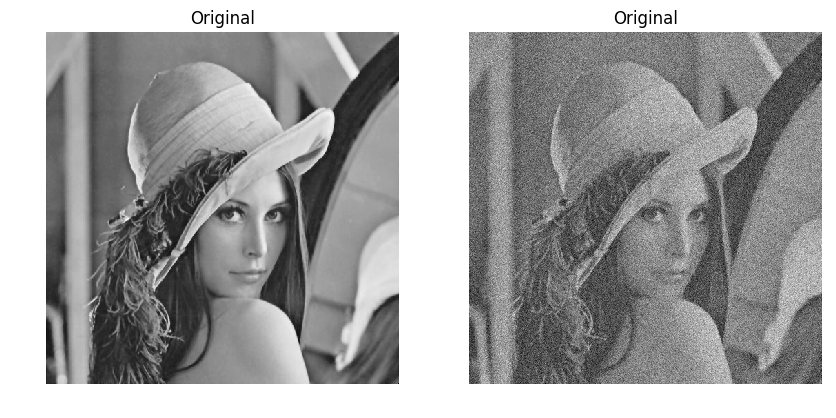

In [28]:
# display
clf;
figure(figsize=(10,10));
Shearlab.imageplot(X, "Original", 1,2,1); 
Shearlab.imageplot(Xnoisy, "Original", 1,2,2); 

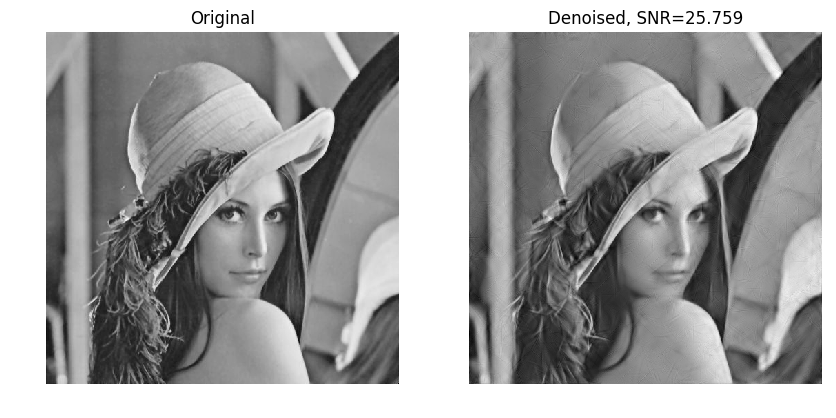

In [30]:
elin = Shearlab.snr(X,Xrec);
# display
clf;
figure(figsize=(10,10));
Shearlab.imageplot(X, "Original", 1,2,1); 
u = @sprintf("Denoised, SNR=%.3f", elin);
Shearlab.imageplot(real(Xrec), u, 1,2,2);